In [112]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix
from IPython.display import Image
import pydotplus
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [6]:
df = pd.read_csv("../data/Movie_regression.csv", header=0)

In [7]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [8]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
dtype: int64

In [9]:
df["Time_taken"].mean()


157.3914979757085

In [10]:
df.fillna({"Time_taken": df["Time_taken"].mean()}, inplace=True)

In [11]:
df.isna().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [13]:
df = pd.get_dummies(df, columns=["3D_available", "Genre"], drop_first=True)

In [14]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,True,False,False,True
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,False,False,True,False
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,False,True,False,False
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,True,False,True,False
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,False,False,True,False


In [15]:
# seperate out the X variables
X = df.loc[:, df.columns!="Collection"]

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
X.shape

(506, 19)

In [18]:
len(X)

506

In [19]:
y = df["Collection"]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [21]:
reg_tree = tree.DecisionTreeRegressor(max_depth=3)

In [22]:
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [23]:
y_train_pred = reg_tree.predict(X_train)
y_test_pred = reg_tree.predict(X_test)

In [24]:
mean_squared_error(y_test, y_test_pred)

117077216.27161306

In [25]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [26]:
r2_score(y_test, y_test_pred)

0.636321038122745

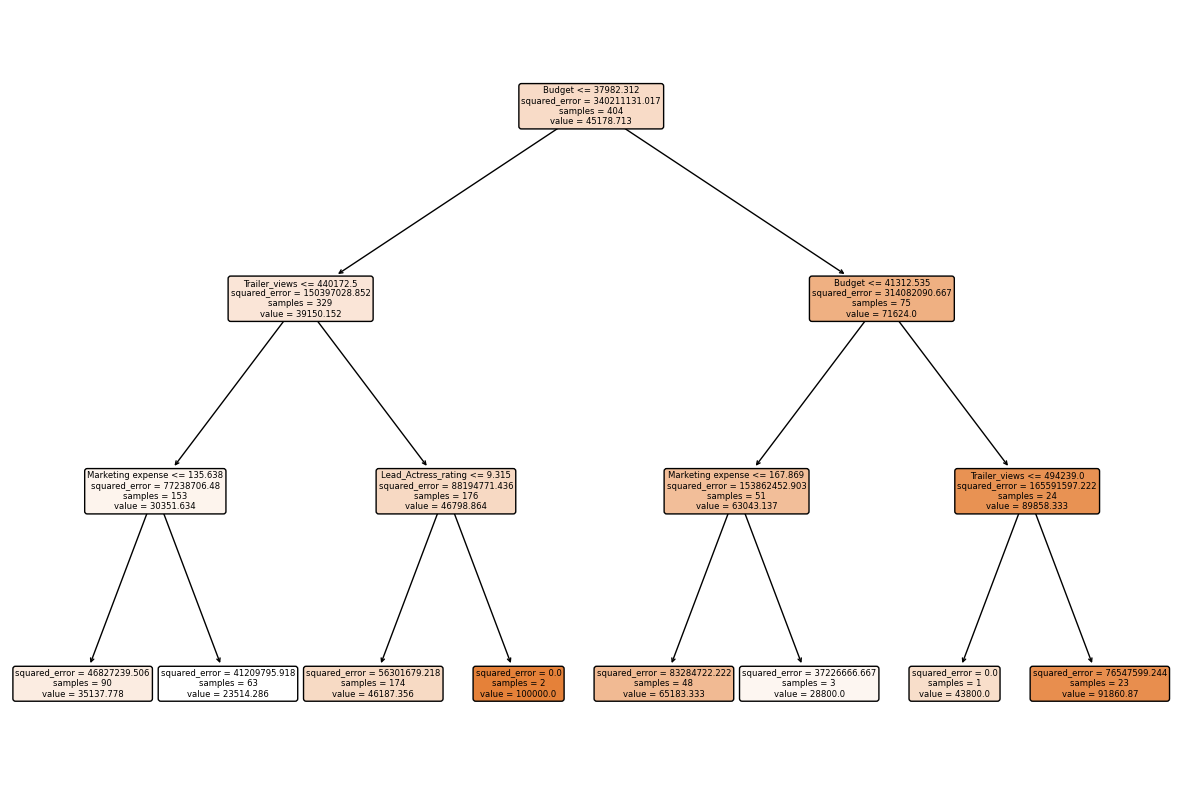

In [27]:


plt.figure(figsize=(15,10))
plot_tree(reg_tree, filled=True, rounded=True, feature_names=X.columns)
plt.show()


In [28]:
reg_tree = tree.DecisionTreeRegressor(
    min_samples_split=3,
    max_depth=4,
    min_samples_leaf=2
)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=3)

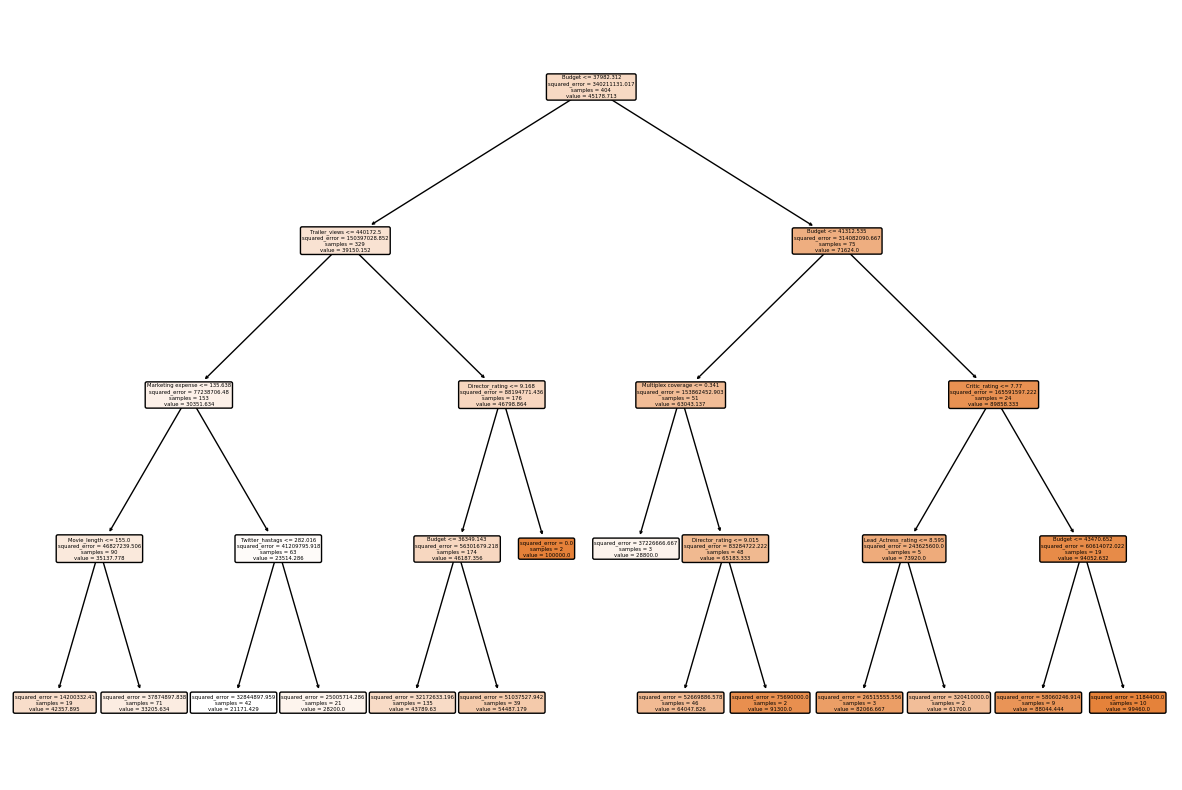

In [29]:
plt.figure(figsize=(15,10))
plot_tree(reg_tree, filled=True, rounded=True, feature_names=X.columns)
plt.show()

In [30]:
r2_score(y_train, y_train_pred)

0.8364651040556869

In [31]:
r2_score(y_test, y_test_pred)

0.636321038122745

In [42]:
df = pd.read_csv("../data/Movie_classification.csv")

In [43]:
df.isna().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [44]:
df.fillna({"Time_taken": df["Time_taken"].mean()}, inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [46]:
df = pd.get_dummies(df, columns=["3D_available", "Genre"], drop_first=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  Time_taken           506 non-null    float64
 12  Twitter_hastags      506 non-null    float64
 13  Avg_age_actors       506 non-null    int64  
 14  Num_multiplex        506 non-null    int64  
 15  Collection           506 non-null    int

In [50]:
X = df.loc[:, df.columns != "Start_Tech_Oscar"]

In [72]:
y = df.loc[:, "Start_Tech_Oscar"]

In [73]:
y

0      1
1      0
2      1
3      1
4      1
      ..
501    0
502    0
503    0
504    0
505    0
Name: Start_Tech_Oscar, Length: 506, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=0
)

In [75]:
y_train

220    1
71     1
240    1
6      0
417    1
      ..
323    1
192    0
117    0
47     1
172    0
Name: Start_Tech_Oscar, Length: 404, dtype: int64

In [76]:
clf_tree = tree.DecisionTreeClassifier(max_depth=3)

In [77]:
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [78]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [79]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [80]:
confusion_matrix(y_train, y_train_pred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [81]:
confusion_matrix(y_test, y_test_pred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [82]:
accuracy_score(y_test, y_test_pred)

0.5490196078431373

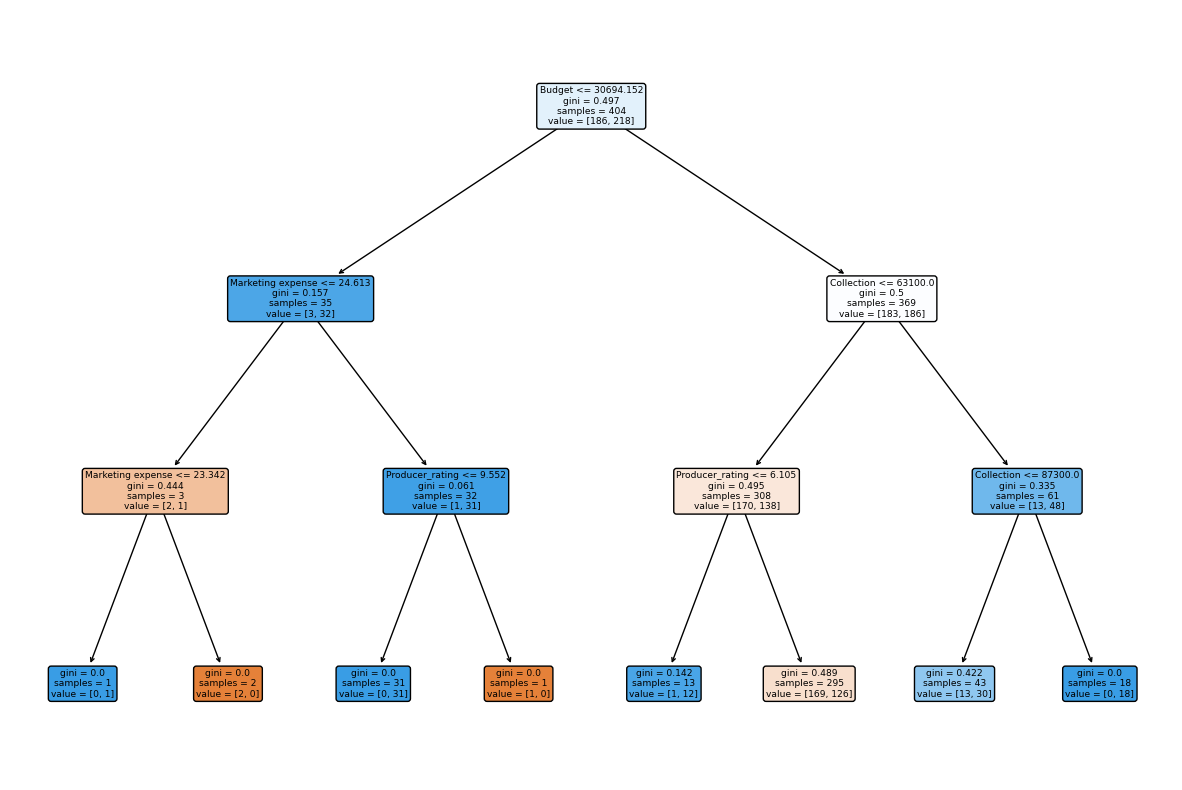

In [83]:
plt.figure(figsize=(15,10))
plot_tree(clf_tree, filled=True, rounded=True, feature_names=X.columns)
plt.show()

In [84]:
clf_tree = tree.DecisionTreeClassifier(
    max_depth=3
    ,min_samples_leaf=20)
clf_tree.fit(X_train, y_train)
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [85]:
accuracy_score(y_test, y_test_pred)

0.5294117647058824

In [89]:
clf_tree = tree.DecisionTreeClassifier()
bag_clf = BaggingClassifier(
    estimator=clf_tree,
    n_estimators=1000,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

In [90]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [91]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [92]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

In [94]:
rf_clf = RandomForestClassifier(
    n_estimators=1000,
    n_jobs=-1,
    random_state=42
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [95]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [96]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

In [98]:
rf_clf = RandomForestClassifier(
    bootstrap=True,
    random_state=289
)

In [99]:
params_grid = {
    "max_depth": [1000, 2000, 3000],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5],
    "max_features": [5, 10, 15],
    "max_leaf_nodes": [2, 5, 10, 15]
}

In [100]:
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=params_grid,
    n_jobs=-1,
    cv=5,
    scoring="accuracy"
)

In [101]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=289),
             n_jobs=-1,
             param_grid={'max_depth': [1000, 2000, 3000],
                         'max_features': [5, 10, 15],
                         'max_leaf_nodes': [2, 5, 10, 15],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [102]:
grid_search.best_params_

{'max_depth': 1000,
 'max_features': 10,
 'max_leaf_nodes': 15,
 'min_samples_leaf': 3,
 'min_samples_split': 2}

In [104]:
cvrf_clf = grid_search.best_estimator_

In [105]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6470588235294118

In [107]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)
accuracy_score(y_test, gbc_clf.predict(X_test))

0.5882352941176471

In [108]:
gbc_clf = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_clf.fit(X_train, y_train)
accuracy_score(y_test, gbc_clf.predict(X_test))

0.6176470588235294

In [110]:
ada_clf = AdaBoostClassifier()
ada_clf.fit(X_train, y_train)
accuracy_score(y_test, ada_clf.predict(X_test))

d:\RepoMan\udemy\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.5588235294117647

In [111]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=3000)
ada_clf.fit(X_train, y_train)
accuracy_score(y_test, ada_clf.predict(X_test))

d:\RepoMan\udemy\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6274509803921569

In [114]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1)
xgb_clf.fit(X_train, y_train)
accuracy_score(y_test, xgb_clf.predict(X_test))

0.6372549019607843

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

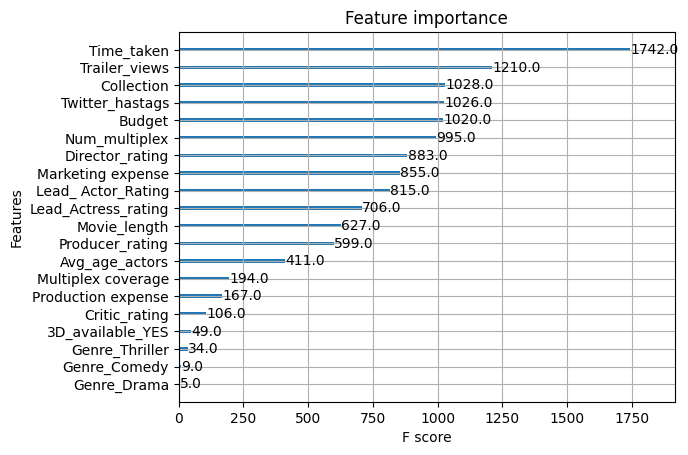

In [115]:
xgb.plot_importance(xgb_clf)

In [117]:
xgb_clf = xgb.XGBClassifier(n_estimators=250, learning_rate=.1)

In [116]:
params_grid = {
    "max_depth": np.arange(2, 10, 2),
    "gamma": np.arange(0, .5, .1),
    "subsample": np.arange(.5, 1, .1),
    "colsample_bytree": np.arange(.5, 1, .1),
    "reg_alpha": [.001, .01, .1]
}

In [118]:
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=params_grid,
    n_jobs=-1,
    cv=5,
    scoring="accuracy"
)

In [119]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                         'gamma': array([0. , 0.1, 0.2, 0.3, 0.4]),
                         'max_depth': array([2, 4, 6, 8]),
                         'reg_alpha': [0.001, 0.01, 0.1],
                         'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
             scoring='accuracy')

In [120]:
grid_search.best_params_

{'colsample_bytree': 0.8999999999999999,
 'gamma': 0.4,
 'max_depth': 6,
 'reg_alpha': 0.01,
 'subsample': 0.8999999999999999}

In [121]:
cvxg_clf = grid_search.best_estimator_

In [122]:
accuracy_score(y_test, cvxg_clf.predict(X_test))

0.6470588235294118